<a href="https://colab.research.google.com/github/Koelgeetkaur26/aai-iot-linear-regression/blob/main/Koelgeet_Kaur_IoT_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Analysis and Prediction for IoT

This notebook holds the Assignment 3.1 for Module 3 in AAI 530, Data Analytics and the Internet of Things. In this assignment, you will use linear regression to make predictions for simulated "streaming" data. The work that you do in this assignment will build on the linear regression predictions that you saw in your text book and in this week's lab session. Be sure to answer the analysis questions thoroughly, as this is a large part of the assignment for this week.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
#use this cell to import additional libraries or define helper functions
from sklearn.metrics import mean_squared_error as mse

## Load and prepare your data

We'll be using the cleaned household electric consumption dataset from Module 2 in this assignment. I recommend saving your dataset by running df.to_csv("filename") at the end of the last assignment so that you don't have to re-do your cleaning steps. If you are not confident in your own cleaning steps, you may ask your instructor for a cleaned version of the data. You will not be graded on the cleaning steps in this assignment, but some functions may not work if you use the raw data.

We need to turn our datetime column into a numeric value to be used as a variable in our linear regression. In the lab session, we created a new column of minutes and just incremented the value by 10 since we knew that the readings occurred every 10 minutes. In this dataset, we have readings every minute, but we might have some missing rows depending on how you cleaned your data. So instead we will convert our datetime column to something called [unix/epoch time](https://en.wikipedia.org/wiki/Unix_time), which is the number of seconds since midnight on 1/1/1970.

**TODO: load your data and convert the datetime column into epoch/unix time**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load your data into a pandas dataframe here
df = pd.read_csv("/content/drive/MyDrive/household_power_clean.csv")

In [4]:
df.head()

Unnamed: 0        Date      Time  Global_active_power  \
0           0  2006-12-16  17:24:00              4.21600   
1           1  2006-12-16  17:25:00              5.36000   
2           2  2006-12-16  17:26:00              5.37400   
3           3  2006-12-16  17:27:00              5.38800   
4           4  2006-12-16  17:28:00              3.66600   

   Global_reactive_power   Voltage  Global_intensity  Sub_metering_1  \
0                0.41800 234.84000          18.40000         0.00000   
1                0.43600 233.63000          23.00000         0.00000   
2                0.49800 233.29000          23.00000         0.00000   
3                0.50200 233.74000          23.00000         0.00000   
4                0.52800 235.68000          15.80000         0.00000   

   Sub_metering_2  Sub_metering_3             Datetime  gap_monthly  \
0         1.00000        17.00000  2006-12-16 17:24:00          NaN   
1         1.00000        16.00000  2006-12-16 17:25:00          NaN   
2         2.00000        17.00000  2006-12-16 17:26:00          NaN   
3         1.00000        17.00000  2006-12-16 17:27:00          NaN   
4         1.00000        17.00000  2006-12-16 17:28:00          NaN   

   grp_monthly  v_monthly  gi_monthly  
0          NaN        NaN         NaN  
1          NaN        NaN         NaN  
2          NaN        NaN         NaN  
3          NaN        NaN         NaN  
4          NaN        NaN         NaN

In [5]:
#convert datetime to epoch/unix time
df['datetime'] = df['Date']+' '+df['Time']
df['unix'] = pd.to_datetime(df['datetime']).view('int64') // 10**9

<ipython-input-5-174ef74b6ceb>:3: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['unix'] = pd.to_datetime(df['datetime']).view('int64') // 10**9


In [6]:
df.head()

Unnamed: 0        Date      Time  Global_active_power  \
0           0  2006-12-16  17:24:00              4.21600   
1           1  2006-12-16  17:25:00              5.36000   
2           2  2006-12-16  17:26:00              5.37400   
3           3  2006-12-16  17:27:00              5.38800   
4           4  2006-12-16  17:28:00              3.66600   

   Global_reactive_power   Voltage  Global_intensity  Sub_metering_1  \
0                0.41800 234.84000          18.40000         0.00000   
1                0.43600 233.63000          23.00000         0.00000   
2                0.49800 233.29000          23.00000         0.00000   
3                0.50200 233.74000          23.00000         0.00000   
4                0.52800 235.68000          15.80000         0.00000   

   Sub_metering_2  Sub_metering_3             Datetime  gap_monthly  \
0         1.00000        17.00000  2006-12-16 17:24:00          NaN   
1         1.00000        16.00000  2006-12-16 17:25:00          NaN   
2         2.00000        17.00000  2006-12-16 17:26:00          NaN   
3         1.00000        17.00000  2006-12-16 17:27:00          NaN   
4         1.00000        17.00000  2006-12-16 17:28:00          NaN   

   grp_monthly  v_monthly  gi_monthly             datetime        unix  
0          NaN        NaN         NaN  2006-12-16 17:24:00  1166289840  
1          NaN        NaN         NaN  2006-12-16 17:25:00  1166289900  
2          NaN        NaN         NaN  2006-12-16 17:26:00  1166289960  
3          NaN        NaN         NaN  2006-12-16 17:27:00  1166290020  
4          NaN        NaN         NaN  2006-12-16 17:28:00  1166290080

## Predicting Global Active Power

We will follow the code from the Chapter 9 in our textbook and the recorded lab session from this week to predict the Global Active Power (GAP) with linear regression.

First we will create our x (time) and y (GAP) training variables, and then define our model parameters.

**Q: What is ph? What is mu?**

A: ph is the Prediction Horizon which is the number of time steps into the future for which we want to predict the output. Based on the value of ph, the model decides how far it has to make the predictions. mu is the Forgetting Factor used to gradually reduce the influence of old data and making the model more adaptive towards the recent trends.

**TODO: Set the ph to be 5 minutes--consider the units that our time column is measured in.**

In [36]:
ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Global_active_power)

ph = 5* 60 #5 minutes
data_resolution = ts.diff().mean().values[0]
ph_index = ph/data_resolution #ph/data resolution (how many timesteps is our ph?)
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

**Q: With mu = 0.9, how much weight will our first data point have on the last (5000th) prediction in our limited dataset?**

A: The formula for calculating the weight that our first data point will have on the 5000th data point is w5000 (weight for 5000th data point)= mu ^ 5000. This is an extremely small value, essentially zero for practical purposes.
This means the first data point has almost no influence on the 5000th prediction.The forgetting factor exponentially reduces the effect of older data points. This can also be verified by a small code block shown in the next cell.







In [9]:
mu = 0.9
t = 5000
weight_5000 = mu ** t
print(weight_5000)


1.631350185342827e-229


**TODO: Following the code from Chapter 9 and the lab session, use linear regression to predict a rolling GAP for our dataset. Store these predictions in the tp_pred and yp_pred lists created above for visualization.**

In [37]:
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)


    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = mu ** (ns - 1 - k)
    weights = np.flip(weights, 0)

    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0]+ ph
    yp = m_tmp * tp + q_tmp

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

Streaming output truncated to the last 5000 lines.
<ipython-input-37-e687a333b480>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-37-e687a333b480>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-37-e687a333b480>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-37-e687a333b480>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated

Now let's visualize the results from our model.

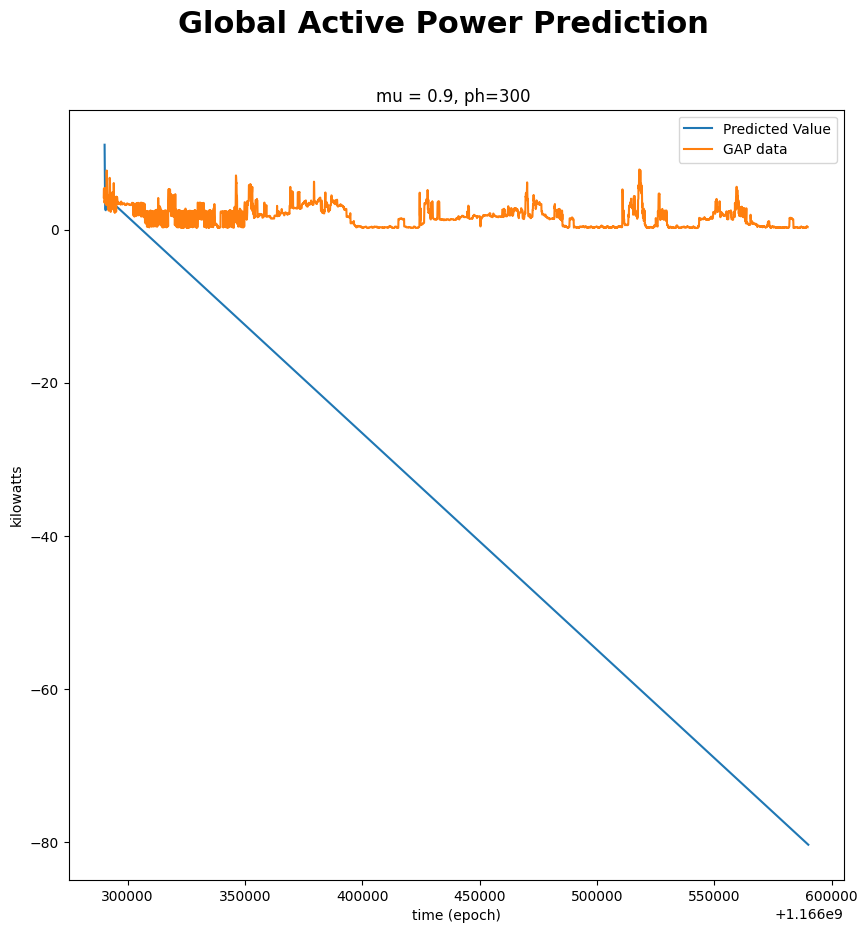

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

It's difficult to tell how the model is performing from this plot.

**TODO: Modify the code above to visualize the first and last 200 datapoints/predictions (can be in separate charts) and compute the MSE for our predictions.**

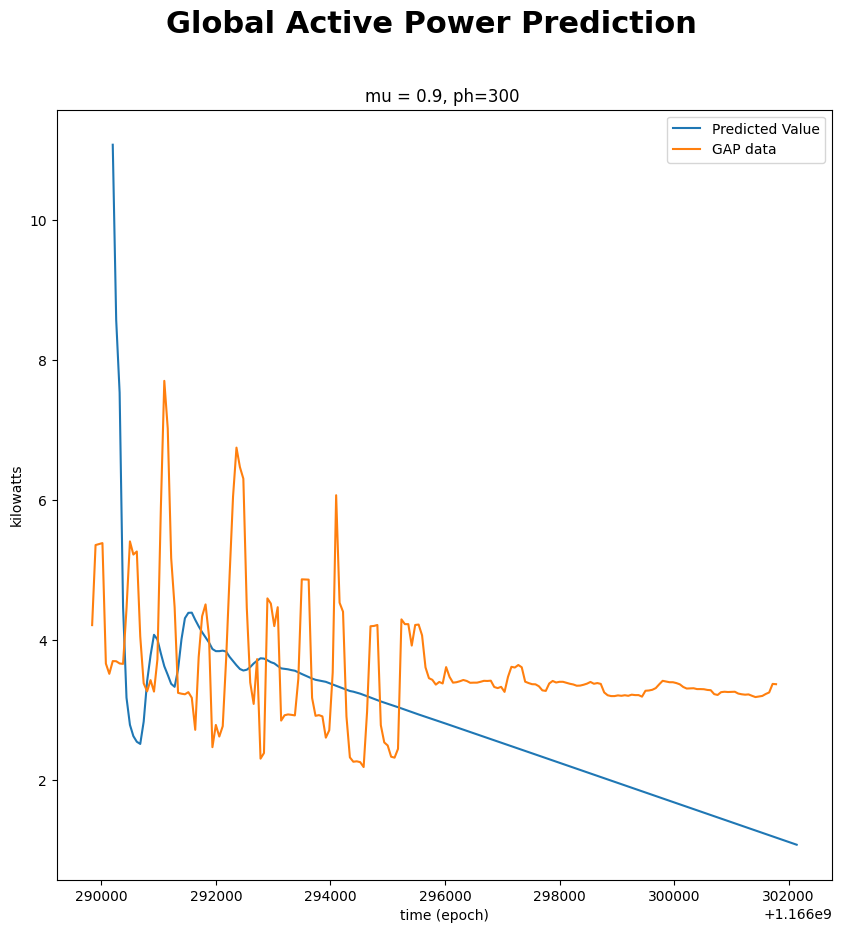

In [39]:
#Plot first 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

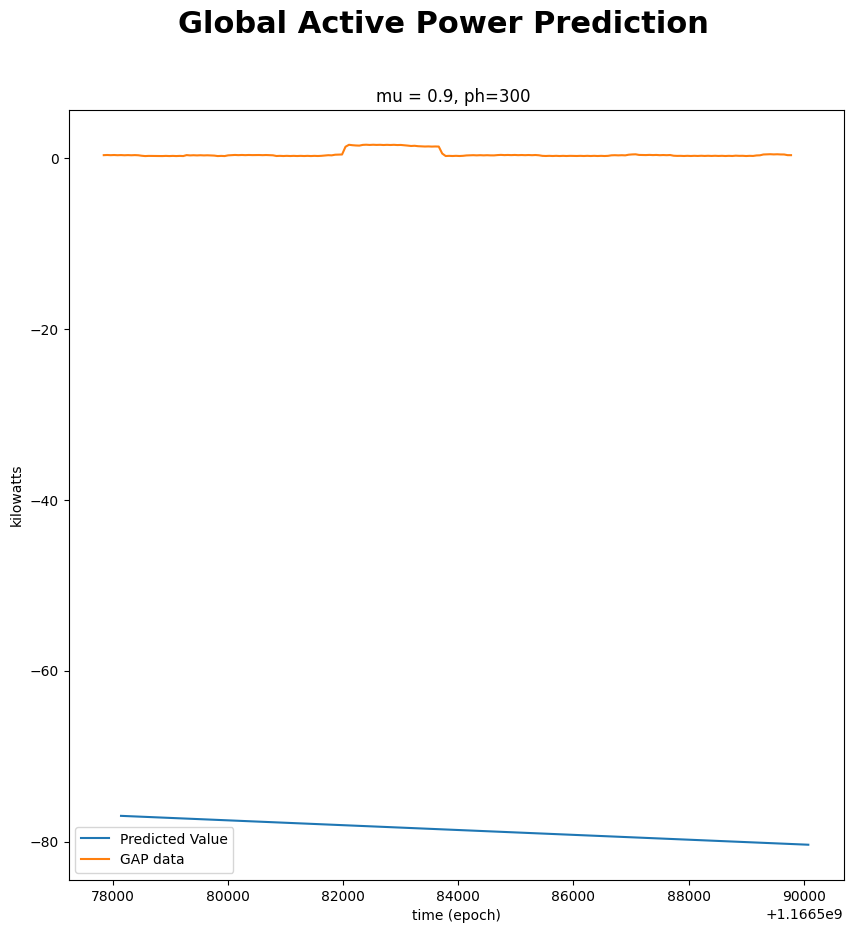

In [41]:
#Plot last 200 data points/predictions
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:n_s,0], ys.iloc[n_s-200:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

In [42]:
#Calculate MSE of predictions
ph_index = int(ph / data_resolution)  # Convert to integer

print("MSE is", mse(ys['Global_active_power'][ph_index:5000+ph_index-1],yp_pred))

MSE is 2147.8074986405086


**Q: How did our model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: From the chart of early predictions, we can see that early on, the model's predictions start with large deviations and then trend downward. The actual power consumption fluctuates heavily, while the model predictions appear smoother. From the chart of late predictions we see that the model's predictions (blue) seem highly inaccurate, with a large initial deviation.
The actual Global Active Power (orange) remains relatively stable but noisy.
The model predictions seem to have a large offset and do not capture the data's behavior well. Moreover, a high MSE means large deviations between predictions and real values.

Thus we can say that the model performs poorly overall, especially in the late predictions.



**TODO: Re-run the prediction code with mu = 1 and mu = 0.01. Use the cells below to produce charts for the first and last 200 points and to compute the MSE for each of these sets of predictions.**

In [43]:
#Re-run prediction code for mu = 1
mu=1
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)


    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = mu ** (ns - 1 - k)
    weights = np.flip(weights, 0)

    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0]+ ph
    yp = m_tmp * tp + q_tmp

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

Streaming output truncated to the last 5000 lines.
<ipython-input-43-58a8142af4c3>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-43-58a8142af4c3>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-43-58a8142af4c3>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-43-58a8142af4c3>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated

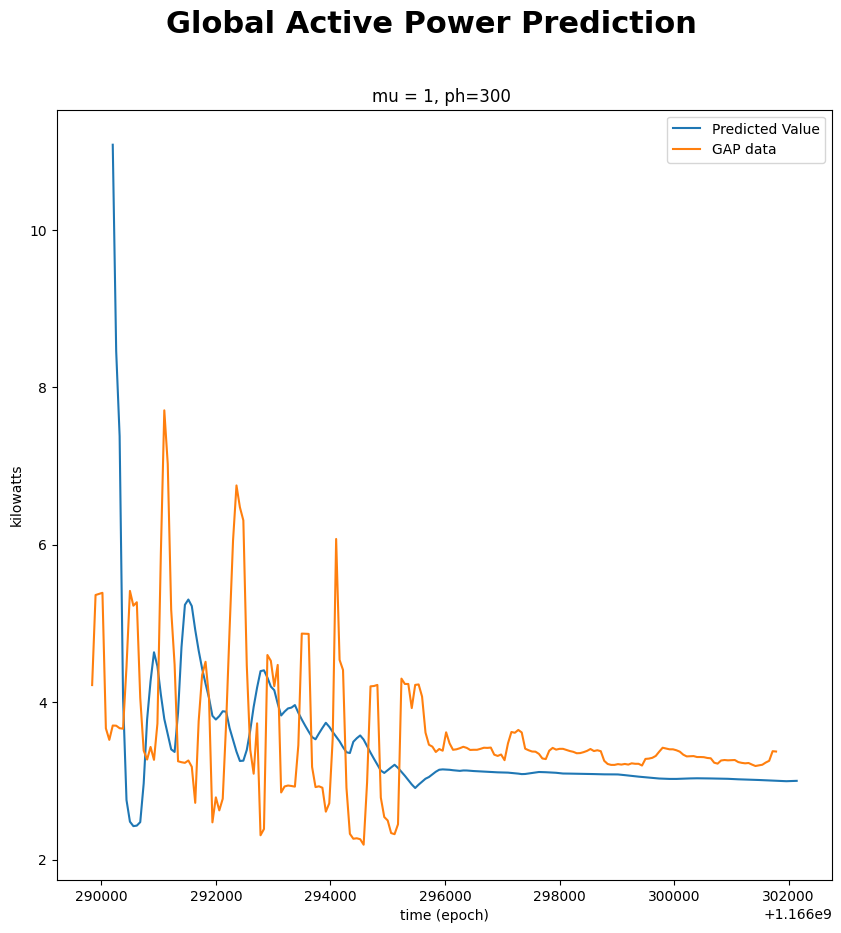

In [44]:
#Plot first 200 data points/predictions for mu = 1
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

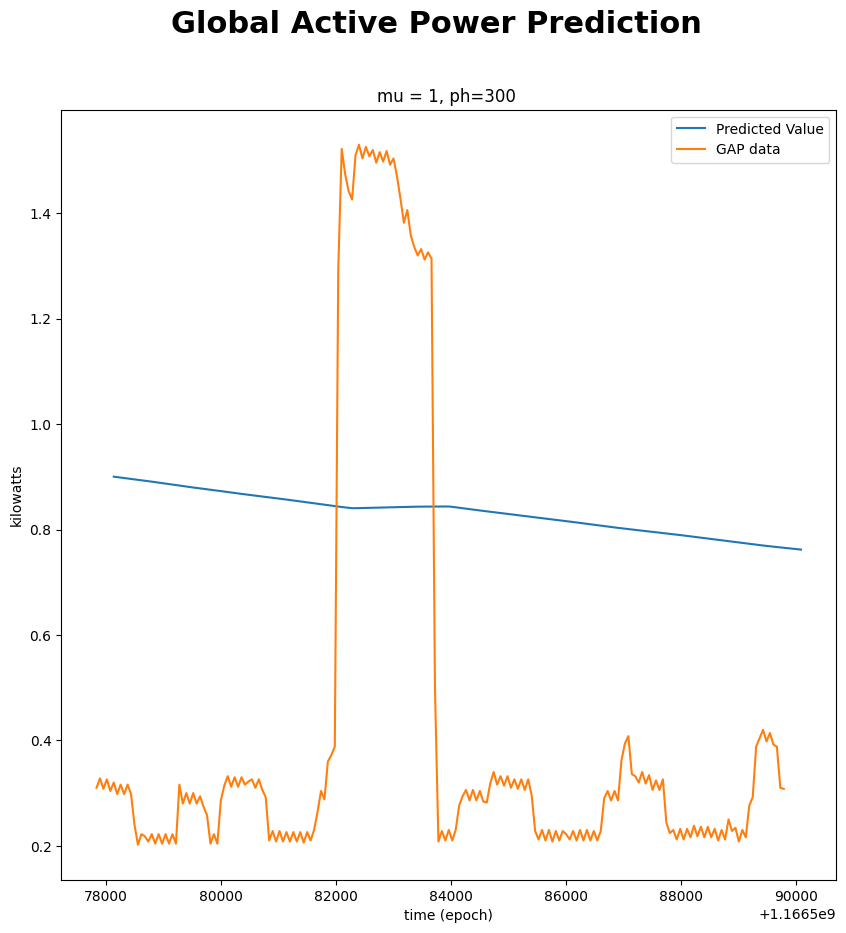

In [45]:
#Plot last 200 data points/predictions for mu = 1
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:n_s,0], ys.iloc[n_s-200:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

In [46]:
#Calculate MSE of predictions for mu = 1
ph_index = int(ph / data_resolution)  # Convert to integer

print("MSE is", mse(ys['Global_active_power'][ph_index:5000+ph_index-1],yp_pred))

MSE is 1.4391219659687071


In [47]:
#Re-run prediction code for mu = 0.01
mu=0.01
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)


    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = mu ** (ns - 1 - k)
    weights = np.flip(weights, 0)

    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0]+ ph
    yp = m_tmp * tp + q_tmp

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

Streaming output truncated to the last 5000 lines.
<ipython-input-47-23c0b9300f70>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-47-23c0b9300f70>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-47-23c0b9300f70>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-47-23c0b9300f70>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated

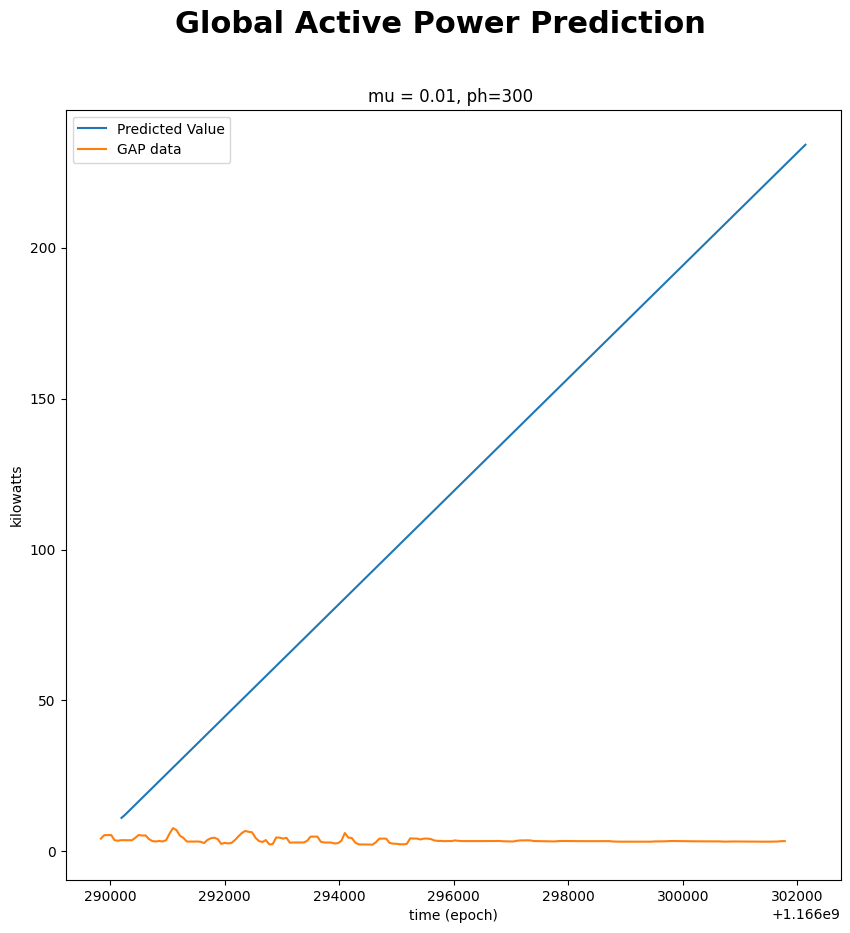

In [48]:
#Plot first 200 data points/predictions for mu = 0.01
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

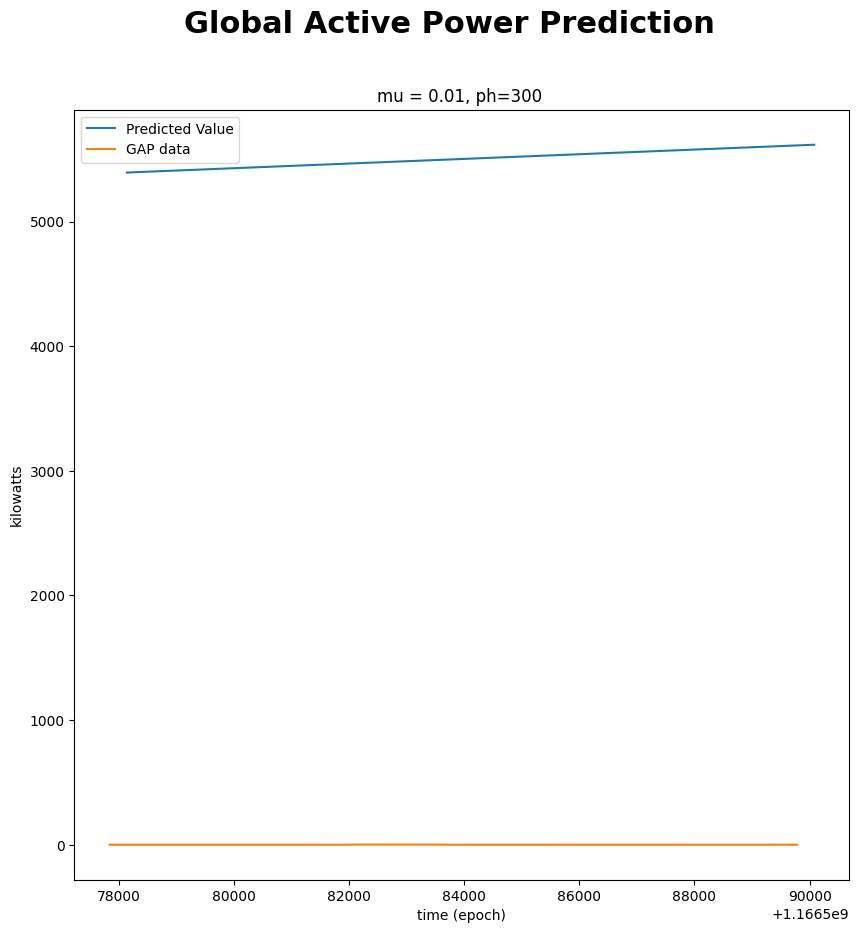

In [49]:
#Plot last 200 data points/predictions for mu = 0.01
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax.plot(ts.iloc[n_s-200:n_s,0], ys.iloc[n_s-200:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

In [50]:
#Calculate MSE of predictions for mu = 0.01
ph_index = int(ph / data_resolution)  # Convert to integer

print("MSE is", mse(ys['Global_active_power'][ph_index:5000+ph_index-1],yp_pred))

MSE is 10527732.486417124


**Q: How did our mu = 1 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: As observed from the early predictions chart, the model’s predicted values (blue) seem smoother and trend downward. Compared to the previous mu = 0.9 model, this one tracks the data slightly better. Here the predicted values seem to follow the trend more closely, but still miss some sharp fluctuations. From the late predictions chart we can observe that the actual GAP data (orange) is highly fluctuating and the model’s predicted values (blue) are much more stable than in the previous mu = 0.9 model. the lower mse value means predictions are closer to actual values, though some fluctuations are still missed. Overall, this model showed improved tracking of actual values compared to mu = 0.9. Also, significantly lower MSE, meaning better overall accuracy.

**Q: How did our mu = 0.01 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: As observed from the early prediction chart we can see that, the actual Global Active Power (GAP) data (orange) remains within a reasonable range,
but the predicted values (blue) exhibit a strong upward trend, deviating drastically from the real values. This suggests that the model is not capturing the underlying trends at all. As seen from the late predictions chart, the actual GAP data (orange) remains within a normal range but the predictions (blue) have exploded to extreme values, reaching thousands of kilowatts while the actual values remain near zero. This suggests that the model has completely lost track of the real data. Moreover, this extremely high MSE confirms that predictions are entirely incorrect.

**Q: Which of these three models is the best? How do you know? Why does this make sense based on the mu parameter used?**

A: The best model among the three is the one with mu = 1.0, as it achieves the lowest MSE of 1.439, indicating the most accurate predictions. This model effectively retains past data without excessive forgetting, leading to stable and reliable predictions over time. In contrast, the mu = 0.9 model, which applies moderate forgetting, starts well but gradually loses stability in later predictions, resulting in a higher MSE of 2147.8. The worst-performing model is mu = 0.01, where excessive forgetting causes the predictions to diverge drastically, leading to an extremely high MSE of 10,527,732.5, making it completely unreliable. These results make sense because mu controls how much past data influences predictions—a high mu (closer to 1) retains important historical trends, ensuring consistency, while a low mu (closer to 0) causes the model to overreact to recent data, leading to instability.

**Q: What could we do to improve our model and/or make it more realistic and useful?**

A: In order to improve our model to make it more realistic and useful we should fine-tune the value of forgetting factor. Setting its value closer to 1 can allow the model to adjust to seasonal variations or sudden changes in trends. Also, optimizing the value of ph can be useful. Currently, we are using ph = 300 (5 minutes), but this might be too long for capturing short-term fluctuations. Testing smaller ph values (e.g., 60 seconds or 120 seconds) could help the model better track rapid changes in power consumption. Moreover, evaluating the model using certain additional performance metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) would provide a better understanding of prediction accuracy and how errors are distributed.



**TODO: Add voltage data as a second variable to our model and re-run the prediction code. Then visualize the first and last 200 points and compute the MSE**

In [51]:
#add voltage to the x-variables in our dataset
ts = pd.DataFrame(df[['unix', 'Voltage']])
ys = pd.DataFrame(df.Global_active_power)

ph = 5*60 #5 minutes
ph_index = ts['unix'].diff().mean()
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

#arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [52]:
#run the prediction code on your expanded dataset
#make sure to adjust your yp prediction to include the coefficients from time AND voltage
for i in range(2, n_s+1):  # Start with 2 leading data points
    # Get "available" data for prediction
    ts_tmp = ts.iloc[:i]  # X data
    ys_tmp = ys.iloc[:i]  # Y data
    ns = len(ys_tmp)

    # Compute forgetting factor weights
    weights = np.array([mu ** (ns - 1 - k) for k in range(ns)])
    weights = np.flip(weights, 0)  # Flip for correct order

    # Perform weighted linear regression
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    # Store model coefficients and intercept
    m_tmp = model_tmp.coef_.flatten()  # Convert to array
    q_tmp = model_tmp.intercept_

    # Compute prediction using both time (unix) and voltage
    tp = ts.iloc[i-1, 0] + ph  # Future timestamp
    voltage = ts.iloc[i-1, 1]  # Corresponding voltage

    # Predict using multiple variables (time & voltage)
    yp = np.dot(m_tmp, [tp, voltage]) + q_tmp

    # Store predictions
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

Streaming output truncated to the last 5000 lines.
<ipython-input-52-26a3db66e318>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-52-26a3db66e318>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-52-26a3db66e318>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-52-26a3db66e318>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated

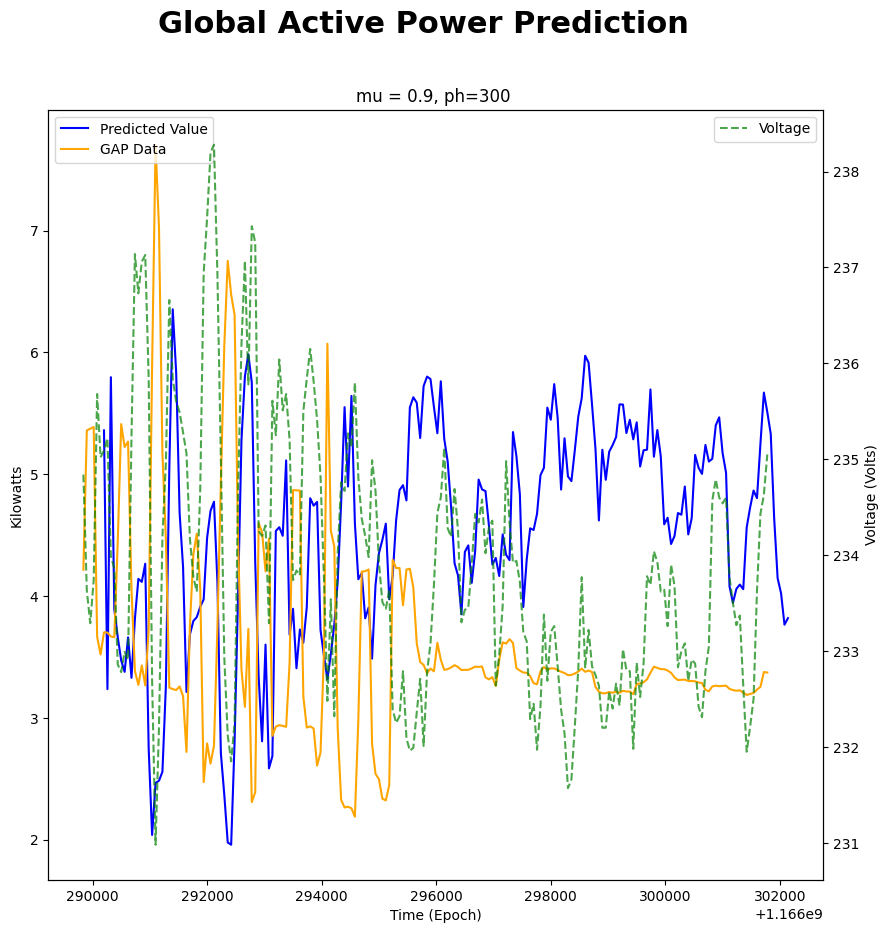

In [53]:
#Plot first 200 data points/predictions for the expanded dataset
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

# Plot predicted values
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value', linestyle='-', color='blue')

# Plot actual GAP data (time vs power)
ax.plot(ts.iloc[:200, 0], ys.iloc[:200, 0], label='GAP Data', linestyle='-', color='orange')

# Add Voltage as a secondary y-axis
ax2 = ax.twinx()
ax2.plot(ts.iloc[:200, 0], ts.iloc[:200, 1], label='Voltage', linestyle='--', color='green', alpha=0.7)

# Labels and legend
ax.set_xlabel('Time (Epoch)')
ax.set_ylabel('Kilowatts')
ax2.set_ylabel('Voltage (Volts)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


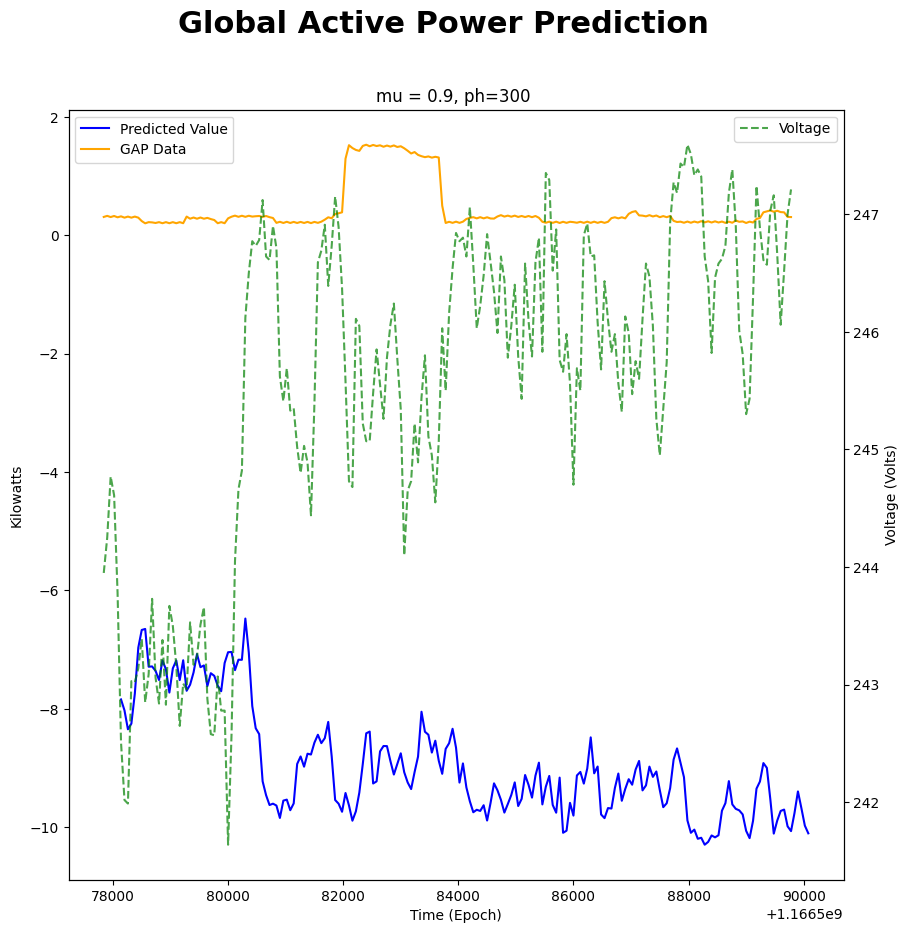

In [54]:
#Plot last 200 data points/predictions for the expanded data
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

# Plot predicted values
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value', linestyle='-', color='blue')

# Plot actual GAP data (time vs power)
ax.plot(ts.iloc[n_s-200:n_s, 0], ys.iloc[n_s-200:n_s, 0], label='GAP Data', linestyle='-', color='orange')

# Add Voltage as a secondary y-axis
ax2 = ax.twinx()
ax2.plot(ts.iloc[n_s-200:n_s, 0], ts.iloc[n_s-200:n_s, 1], label='Voltage', linestyle='--', color='green', alpha=0.7)

# Labels and legend
ax.set_xlabel('Time (Epoch)')
ax.set_ylabel('Kilowatts')
ax2.set_ylabel('Voltage (Volts)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [56]:
#Calculate MSE of predictions for the expanded data

ph_index = int(ph / data_resolution)  # Convert to integer
print("MSE is", mse(ys['Global_active_power'][ph_index:5000+ph_index-1],yp_pred))

MSE is 29.494280485147105


**Q: How did the model performed when you added the voltage data? How does it compare to the models without it?**

A: From the early prediction chart we can observe that, the predicted values (blue) follow the actual data (orange) much more closely than previous models.
The fluctuations in voltage (green dashed line) show that there is a relationship between Voltage and Global Active Power, which the model is now utilizing. The overall trend looks more stable and realistic, meaning that adding Voltage helped reduce prediction drift. From the late predictions we can observe that the predicted values (blue) start to diverge more significantly, suggesting that the model is struggling to capture longer-term trends with the given mu = 0.9. The actual GAP data (orange) remains within a stable range, but the predicted values drop significantly into negative values, which indicates potential overfitting or bias in later predictions. Voltage (green dashed line) shows fluctuations that correlate with some of the changes in predicted power, but the model seems to struggle with longer-term forecasting.




There are lots of other ways that we could try to improve our model while still using linear regression.

**TODO: Choose one alternative model and re-run the prediction code. Some ideas include:**

- Use a moving average as the response variable
- Make your prediction based on the time of day instead of as a continuous time series
- Use a moving window to limit your predictions instead of using a mu factor

**Q: Describe your alternative model and why it might improve your model**

A: One way to improve the linear regression model while still keeping it simple is to use the moving average as the response variable. The moving average method reduces Short-Term Fluctuations by smoothing out the power consumption noises. Also, it helps to capture the trends better by learning the underlying patterns instead of reacting to every small change. Moreover, it helps in more statble predictions as the model avoids large spikes or sudden jumps in predictions.

In [61]:
#create your alternative training data here
ph = 5*60 #5 minutes
ph_index = 10
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

#arrays to hold predicted values
window_size = 10
df['GAP_MA'] = df['Global_active_power'].rolling(window=window_size).mean()

df.dropna(axis=0,inplace=True)

ts = pd.DataFrame(df[['unix', 'Voltage']])
ys = df['GAP_MA']
#you may need to adjust these
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [62]:
#re-run the prediction code here
for i in range(2, n_s+1):
    ts_tmp = ts.iloc[0:i]
    ys_tmp = ys.iloc[0:i]
    ns = len(ys_tmp)

    weights = np.ones(ns) * mu
    for k in range(ns):
        weights[k] = mu ** (ns - k - 1)
    weights = np.flip(weights, 0)


    lm_tmp = LinearRegression()
    lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)


    m_tmp = lm_tmp.coef_
    q_tmp = lm_tmp.intercept_


    tp = ts_tmp.iloc[-1, 0] + ph
    yp = lm_tmp.predict(ts_tmp.iloc[-1:].values)[0]

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warn

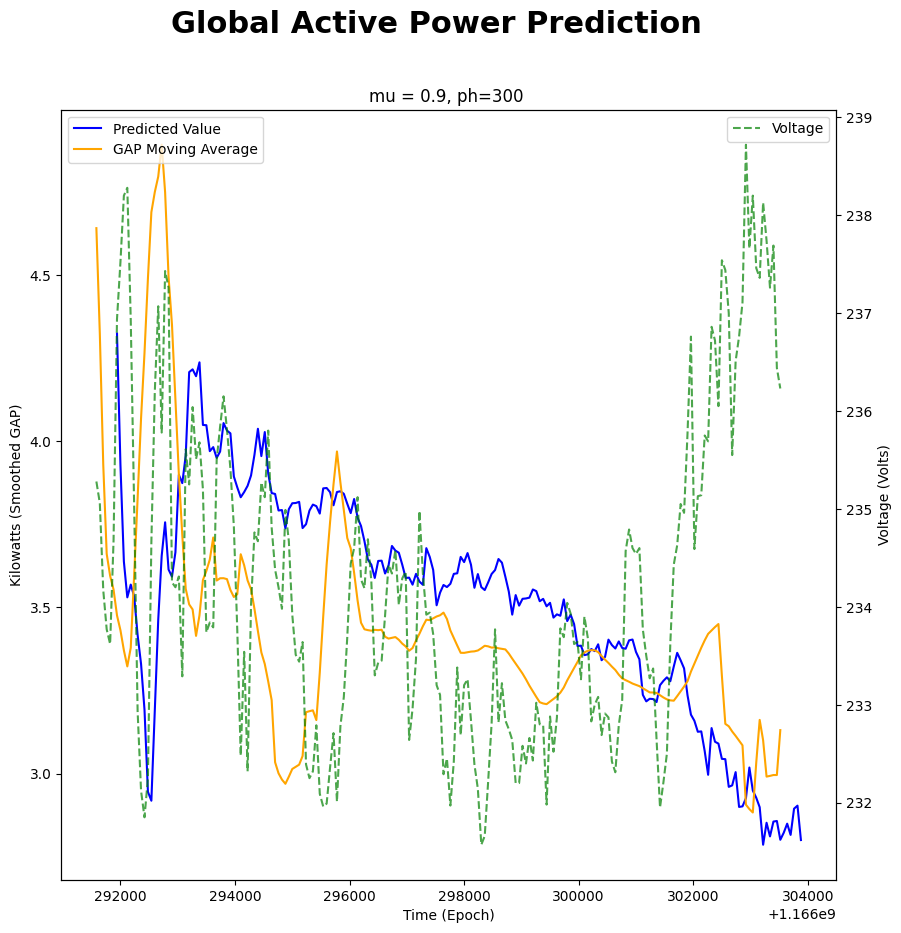

In [65]:
#Plot first 200 data points/predictions for alternative model
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

# Convert ys (GAP_MA) to NumPy array for indexing consistency
ys = ys.values  # Ensures correct slicing

# Plot first 200 predicted values
ax.plot(tp_pred[:200], yp_pred[:200], label='Predicted Value', linestyle='-', color='blue')

# Plot first 200 actual moving average values
ax.plot(ts.iloc[:200, 0], ys[:200], label='GAP Moving Average', linestyle='-', color='orange')

# Add Voltage as a secondary y-axis
ax2 = ax.twinx()
ax2.plot(ts.iloc[:200, 0], ts.iloc[:200, 1], label='Voltage', linestyle='--', color='green', alpha=0.7)

# Labels and legend
ax.set_xlabel('Time (Epoch)')
ax.set_ylabel('Kilowatts (Smoothed GAP)')
ax2.set_ylabel('Voltage (Volts)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


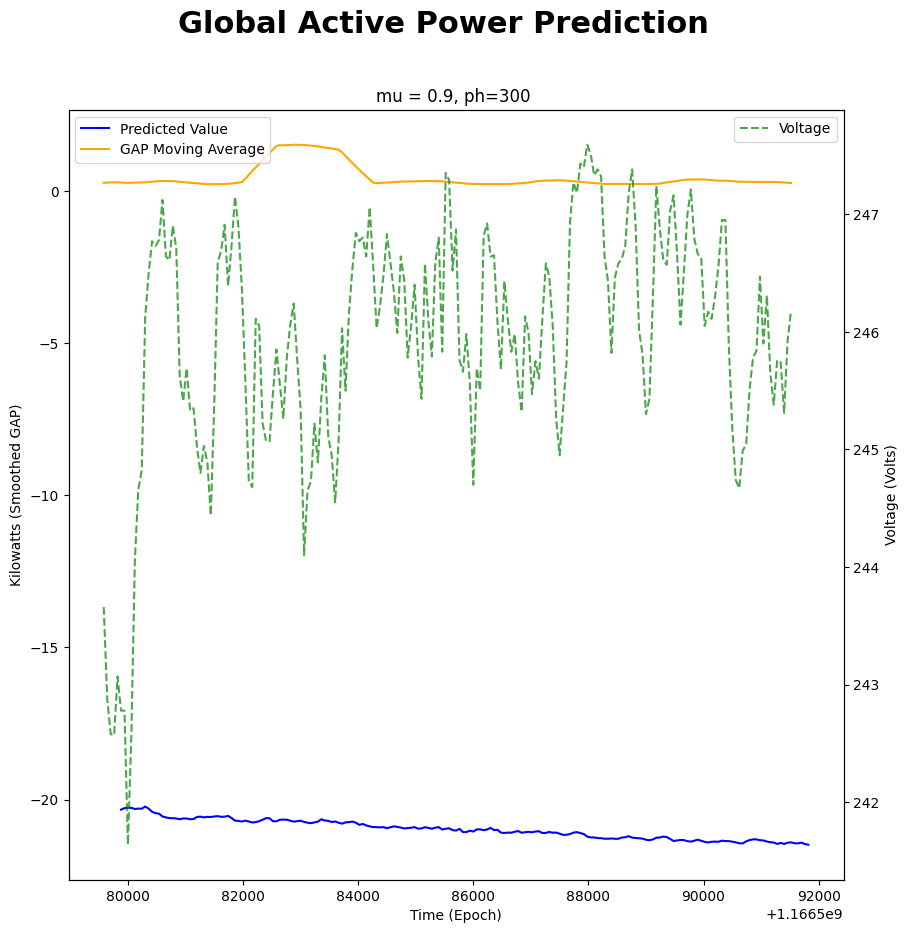

In [69]:
#Plot last 200 data points/predictions for alternative model

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

# Ensure ys is a NumPy array, but only convert it if it's still a Pandas Series
if isinstance(ys, pd.Series):
    ys = ys.values  # Convert to NumPy array ONLY if it's still a Pandas Series

# Plot last 200 predicted values
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value', linestyle='-', color='blue')

# Plot last 200 actual moving average values (GAP_MA)
ax.plot(ts.iloc[n_s-200:n_s, 0], ys[n_s-200:n_s], label='GAP Moving Average', linestyle='-', color='orange')

# Add Voltage as a secondary y-axis
ax2 = ax.twinx()
ax2.plot(ts.iloc[n_s-200:n_s, 0], ts.iloc[n_s-200:n_s, 1], label='Voltage', linestyle='--', color='green', alpha=0.7)

# Labels and legend
ax.set_xlabel('Time (Epoch)')
ax.set_ylabel('Kilowatts (Smoothed GAP)')
ax2.set_ylabel('Voltage (Volts)')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()




In [71]:
#Calculate MSE of predictions for alternative model
actual_values = ys[-(len(yp_pred)):]  # Match length to predictions
mse_value = mse(actual_values, yp_pred)

print("MSE with Moving Average Model:", mse_value)

MSE with Moving Average Model: 152.0157936359282


**Q: Did your alternative model improve on our previous results? What else could you do to improve the model while still using linear regression?**

A: Yes, the moving average model improved stability but did not fully solve the prediction errors.

Strengths of the Moving Average Model

-- Reduces short-term noise → Predictions are smoother and more stable.

--Captures long-term trends → Unlike the original model, which was more reactive to fluctuations.

-- Voltage trends align better → The green voltage line correlates with changes in power.

Weaknesses of the Moving Average Model


-- Slower response to sudden changes → Because of averaging, the model is less adaptive.

-- Higher overall MSE → Suggests that some important short-term variations are lost.

-- Late-stage drift → Predictions diverge negatively over time, which may be due to the fixed moving window size.

A Hybrid Model: Moving Average + Exponential Forgetting can be used to improve the model. Instead of replacing the power variable entirely with the moving average, combine both approaches:

-- Use moving average for smoothing.

-- Apply forgetting factor to allow adaptability.

